In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, InputLayer, MaxPooling2D
from tensorflow.keras import utils

from tensorflow.keras.losses import categorical_crossentropy

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

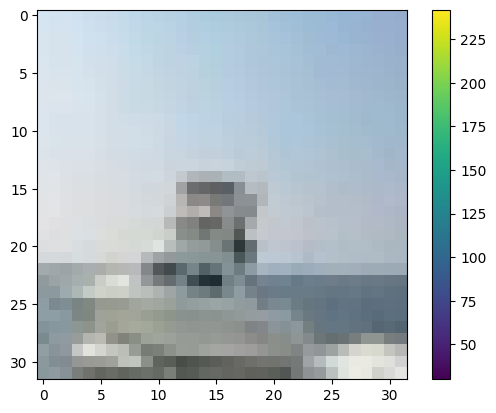

In [3]:
plt.figure()
plt.imshow(x_train[100])
plt.colorbar()
plt.grid(False)

In [4]:
x_train = x_train/ 255
x_test = x_test/ 255

In [5]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)





In [6]:
model = keras.Sequential([
                          keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (32,32,3)),
                          keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape = (32,32,3)),
                          keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
                          keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape = (32,32,3)),
                          keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', input_shape = (32,32,3)),
                          keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
                          keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', input_shape = (32,32,3)),
                          keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(10, activation="softmax")
])

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [8]:
model.compile(loss=categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


In [9]:
model.fit(x_train, y_train_cat, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 458s 726ms/step - loss: 1.5578 - accuracy: 0.4309 - val_loss: 1.1841 - val_accuracy: 0.5848
Epoch 2/10
625/625 [==============================] - 428s 684ms/step - loss: 1.0278 - accuracy: 0.6356 - val_loss: 0.9025 - val_accuracy: 0.6861
Epoch 3/10
625/625 [==============================] - 391s 625ms/step - loss: 0.8007 - accuracy: 0.7190 - val_loss: 0.7611 - val_accuracy: 0.7337
Epoch 4/10
625/625 [==============================] - 304s 486ms/step - loss: 0.6624 - accuracy: 0.7675 - val_loss: 0.7279 - val_accuracy: 0.7508
Epoch 5/10
625/625 [==============================] - 302s 484ms/step - loss: 0.5562 - accuracy: 0.8052 - val_loss: 0.7077 - val_accuracy: 0.7658
Epoch 6/10
625/625 [==============================] - 336s 537ms/step - loss: 0.4690 - accuracy: 0.8354 - val_loss: 0.7273 - val_accuracy: 0.7530
Epoch 7/10
625/625 [==============================] - 337s 539ms/step - loss: 0.3811 - accuracy: 0.8661 - val_loss: 0.7456 -

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 29s 76ms/step - loss: 0.9334 - accuracy: 0.7585
Test loss: 0.9334105253219604
Test accuracy: 0.7584999799728394


In [11]:
predictions = model.predict(x_train)

1563/1563 [==============================] - 161s 88ms/step


In [15]:
predictions[0]

array([2.7721311e-08, 1.5811576e-09, 1.5363728e-03, 3.7530106e-02,
       2.0599309e-05, 4.4587534e-03, 9.5644021e-01, 1.3894432e-05,
       4.1211603e-09, 6.9647815e-11], dtype=float32)

In [15]:
np.argmax(predictions[100])

8

In [16]:
y_train[100]

8

Text(0.5, 0, 'frog')

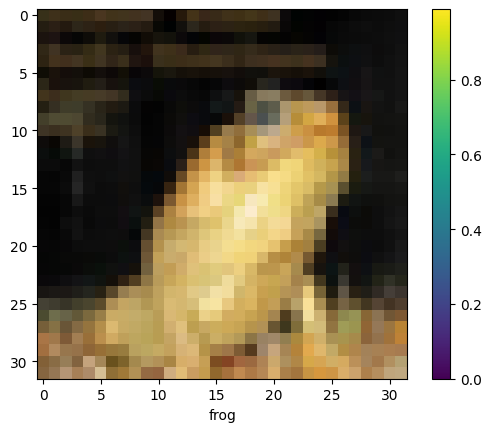

In [17]:
y_train = y_train.flatten()
y_test = y_test.flatten()

plt.figure()
plt.imshow(x_train[12321])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_train[12321]])